In [1]:
!pip install pandas

In [2]:
!pip install folium

In [61]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt2
import folium

In [62]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## Load Data

In [63]:
NL = pd.read_csv('data/Dataset_for_Solo_Project.csv', sep=';')
LS = pd.read_csv('data/LifeStyleNL.csv', sep=';')

## Population Dynamics data

In [64]:
NL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Columns: 190 entries, ID to NaturalizationsRelative_188
dtypes: float64(188), int64(1), object(1)
memory usage: 179.7+ KB


In [65]:
NL.shape

(121, 190)

In [66]:
NL.Periods = NL.Periods.str.replace('JJ00','')

In [67]:
NL.Periods=NL['Periods'].astype(int)

In [68]:
NL.head()


,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,YoungerThan20Years_5,k_20To44Years_6,k_45To64Years_7,k_65To79Years_8,k_80YearsOrOlder_9,GreenPressure_10,GreyPressure_11,TotalPopulation_12,NeverMarried_13,Married_14,Widowed_15,Divorced_16,TotalPopulation_17,NorthNetherlands_18,EastNetherlands_19,WestNetherlands_20,SouthNetherlands_21,TotalPopulation_22,LessThan5000Inhabitants_23,k_5000To19999Inhabitants_24,k_20000To49999Inhabitants_25,k_50000To99999Inhabitants_26,k_100000InhabitantsOrMore_27,TotalNumberOfMunicipalities_28,LessThan5000Inhabitants_29,k_5000To19999Inhabitants_30,k_20000To49999Inhabitants_31,k_50000To99999Inhabitants_32,k_100000InhabitantsOrMore_33,TotalForeignNationalities_34,American_35,Belgian_36,British_37,German_38,Italian_39,Moroccan_40,Spanish_41,Turkish_42,FormerYugoslavian_43,PersonsWithSurinameseBackground_44,PersonsWithAntilleanBackground_45,TotalPrivateHouseholds_46,MalesAndFemales_47,Males_48,Females_49,MultiPersonHouseholds_50,AverageHouseholdsize_51,TotalPersonsInPrivateHouseholds_52,ChildrenInPrivateHouseholds_53,LiveBornChildren_54,Deaths_55,NaturalIncrease_56,Immigration_57,EmigrationIncludingAdministrativeC_58,NetMigration_59,TotalGrowth_60,TotalGrowthRelative_61,LiveBornChildren_62,LiveBornChildrenRelative_63,SexRatio_64,AverageNumberOfChildrenPerFemale_65,TotalLiveBornChildren_66,YoungerThan20Years_67,k_20To24Years_68,k_25To29Years_69,k_30YearsOrOlder_70,k_1stChild_71,k_2ndChild_72,k_3rdChild_73,k_4thAndSubsequentChildren_74,LiveBornChildrenMotherNotMarried_75,Deaths_76,DeathsRelative_77,DeathsSexRatio_78,LifeExpectancyAtBirthMale_79,LifeExpectancyAtBirthFemale_80,k_28WeeksOrMoreRelative_81,k_24WeeksOrMoreRelative_82,PerinatalMortality24_83,PerinatalMortality24Relative_84,PerinatalMortality28_85,PerinatalMortality28Relative_86,Deaths4WeeksAfterBirth_87,Deaths4WeeksAfterBirthRelative_88,Deaths1YearAfterBirth_89,Deaths1YearAfterBirthRelative_90,k_1To4Years_91,k_5To14Years_92,k_15To44Years_93,k_45To64Years_94,k_65To79Years_95,k_80YearsOrOlder_96,PersonsMovedWithinMunicipalities_97,TotalPersons_98,TotalPersonsRelative_99,WithinTheSameProvinceRelative_100,FamiliesUntil2010Relative_101,TotalImmigration_102,Dutch_103,TotalNonDutch_104,EuropeanUnionExcludingDutch_105,Moroccan_106,Turkish_107,TotalEmigrationIncludingAdministra_108,Dutch_109,TotalNonDutch_110,EuropeanUnionExcludingDutch_111,Moroccan_112,Turkish_113,TotalEmigrationExcludingAdministra_114,Dutch_115,TotalNonDutch_116,EuropeanUnionExcludingDutch_117,Moroccan_118,Turkish_119,TotalImmigration_120,TheNetherlands_121,EuropeanUnionExcludingTheNetherl_122,Indonesia_123,SurinameAndTheNetherlandsAntilles_124,Suriname_125,TheFormerNetherlandsAntilles_126,Morocco_127,Turkey_128,SpecificEmigrationCountries_129,TotalEmigrationIncludingAdministra_130,TheNetherlands_131,EuropeanUnionExcludingTheNetherl_132,Indonesia_133,SurinameAndTheNetherlandsAntilles_134,Suriname_135,TheFormerNetherlandsAntilles_136,Morocco_137,Turkey_138,SpecificEmigrationCountries_139,TotalEmigrationExcludingAdministra_140,TheNetherlands_141,EuropeanUnionExcludingTheNetherl_142,Indonesia_143,SurinameAndTheNetherlandsAntilles_144,Suriname_145,TheFormerNetherlandsAntilles_146,Morocco_147,Turkey_148,SpecificEmigrationCountries_149,TotalImmigration_150,EuropeanUnionExcludingTheNetherl_151,IndonesiaSurinameTheNetherlan_152,SurinameAndTheNetherlandsAntilles_153,Indonesia_154,Suriname_155,TheFormerNetherlandsAntilles_156,Morocco_157,Turkey_158,SpecificEmigrationCountries_159,TotalEmigrationExcludingAdministra_160,EuropeanUnionExcludingTheNetherl_161,IndonesiaSurinameTheNetherlan_162,SurinameAndTheNetherlandsAntilles_163,Indonesia_164,Suriname_165,TheFormerNetherlandsAntilles_166,Morocco_167,Turkey_168,SpecificEmigrationCountries_169,Marriages_170,MarriagesPer1000Inhabitants_171,MarriagesPer1000UnmarriedMen_172,k_1stMarriageForBothPartnersRelative_173,AverageAgeMarryingMales_174,AverageAgeMarryingFemales_175,MarriageDissolutions_176,MarriageDissolutionsPer1000Inhab_177,Marr

In [69]:
gender_df=NL[['Periods','Males_2','Females_3']]
gender_df=pd.melt(gender_df,id_vars=['Periods'])
gender_df.head()

,Periods,variable,value
0,1899,Males_2,NaN
1,1900,Males_2,2521.0
2,1901,Males_2,2550.0
3,1902,Males_2,2584.0
4,1903,Males_2,2622.0


In [70]:
NL.dtypes

ID                                            int64
Periods                                       int32
TotalPopulation_1                           float64
Males_2                                     float64
Females_3                                   float64
TotalPopulation_4                           float64
YoungerThan20Years_5                        float64
k_20To44Years_6                             float64
k_45To64Years_7                             float64
k_65To79Years_8                             float64
k_80YearsOrOlder_9                          float64
GreenPressure_10                            float64
GreyPressure_11                             float64
TotalPopulation_12                          float64
NeverMarried_13                             float64
Married_14                                  float64
Widowed_15                                  float64
Divorced_16                                 float64
TotalPopulation_17                          float64
NorthNetherl

## Life Style data

In [71]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 130 entries, ID to BloodDonors1870Years_125
dtypes: float64(125), int64(1), object(4)
memory usage: 1.1+ MB


In [72]:
LS.shape

(1113, 130)

In [73]:
LS.Periods = LS.Periods.str.replace('JJ00','')

In [74]:
LS.Periods=LS['Periods'].astype(int)

In [75]:
LS.head()

,ID,CharacteristicsPersons,Description,Margins,Periods,Smokers_1,FormerSmokers_2,PersonsWhoNeverSmoked_3,DailySmokersInThePopulation_4,DailySmokersAmongSmokers_5,HeavySmokersInThePopulation_6,HeavySmokersAmongSmokers_7,CigaretteSmokers_8,CigarettesPerDayPerSmoker_9,SmokingYearsCurrentCigaretteSmokers_10,QuittingAttemptsInThePast12Months_11,SmokingYearsFormerCigaretteSmokers_12,QuittingYearsFormerCigaretteSmokers_13,ECigarette_14,ECigaretteRegularlyOrEveryDay_15,AlmostNever_16,LessThan1HourPerDay_17,k_1HourPerDayOrMore_18,AlmostNever_19,LessThan1HourPerDay_20,k_1HourPerDayOrMore_21,AlmostNever_22,NotDaily_23,DailyLessThanOneHour_24,DailyOneHourOrMore_25,Drinkers_26,FormerDrinkers_27,PersonsWhoNeverDrankAlcohol_28,HeavyDrinkersInThePopulation_29,HeavyDrinkersAmongDrinkers_30,ExcessiveDrinkersInThePopulation_31,ExcessiveDrinkersAmongDrinkers_32,NumberOfAlcoholicBeveragesPerDay_33,UpTo1GlassPerDayInThePopulation_34,GuidelineAlcoholUse_35,LastMonth_36,LastYear_37,Ever_38,LastMonth_39,LastYear_40,Ever_41,LastMonth_42,LastYear_43,Ever_44,LastMonth_45,LastYear_46,Ever_47,LastMonth_48,LastYear_49,Ever_50,LastMonth_51,LastYear_52,Ever_53,LastMonth_54,LastYear_55,Ever_56,ReportedLength18YearsOrOlder_57,ReportedWeight18YearsOrOlder_58,Underweight_59,NormalWeight_60,Overweight_61,ModerateOverweight_62,SevereOverweight_63,ComplyWithPhysicalActivityGuidelines_64,SufficientlyActiveModerateIntensity_65,SufficientMuscleBoneStrengthActiv_66,WeeklySporter_67,SubscriptionSportsProvider_68,MemberSportsClub_69,Inactive_70,SemiActive_71,NormActive_72,Inactive_73,SemiActive_74,NormActive_75,MeetingTheCombinationNorm_76,WeeklySporter_77,HighRiskSexualActivity_78,RiskUnplannedPregnancy1649Years_79,HIVTest_80,STDTestExcludingHIVTest_81,UseOfContraceptionPillIncl1649_82,UseOfContraceptivePill1649Years_83,SufficientFruitDuring7DaysAWeek_84,AtLeast5DaysAWeekSufficientFruit_85,SufficientVegetablesDuring7DaysWeek_86,AtLeast5DaysWkSufficientVegetables_87,AtLeastOneDayAWeek_88,Min2DaysWeekOfWhich1XOilyFish_89,InThePast5Years_90,MoreThan5YearsAgo_91,Never_92,DonTKnow_93,InThePast2Years_94,MoreThan2YearsAgo_95,Never_96,DonTKnow_97,InThePast5Years_98,NotInThePast5Years_99,DonTKnow_100,InThePast12Months_101,MoreThan12MonthsAgo_102,Never_103,DonTKnow_104,InThePast12Months_105,MoreThan12MonthsAgo_106,Never_107,DonTKnow_108,InThePast12Months_109,MoreThan12MonthsAgo_110,Never_111,DonTKnow_112,InThePast2Years_113,MoreThan2YearsAgo_114,Never_115,DonTKnow_116,InThePast12Months_117,MoreThan12MonthsAgo_118,Never_119,DonTKnow_120,InfluenzaInoculation16YearsOrOlder_121,InformalCareGiver_122,HoursOfInformalCarePerWeek_123,StrainedInformalCareGivers_124,BloodDonors1870Years_125
0,0,T009002,Total,MW00000,2014,24.2,29.8,46.1,18.4,76.1,4.1,17.0,22.3,10.7,25.3,33.7,19.4,19.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.3,11.2,11.4,8.7,11.3,9.2,11.9,1.4,40.6,39.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,77.5,2.0,54.9,43.1,31.5,11.7,NaN,NaN,NaN,NaN,NaN,NaN,12.6,31.1,56.3,58.3,18.4,23.3,58.4,51.4,2.2,15.6,5.2,5.8,72.9,38.1,26.2,35.2,28.2,54.5,55.7,14.6,52.2,22.2,21.9,3.6,36.9,17.6,44.5,1.0,24.5,69.7,5.8,48.9,39.4,7.3,4.4,30.8,26.0,34.5,8.7,32.9,27.5,29.0,10.6,6.9,6.3,81.0,5.8,2.5,13.9,81.8,1.7,26.1,NaN,NaN,NaN,4.8
1,1,T009002,Total,MW00000,2015,24.6,28.8,46.6,18.2,74.0,3.8,15.3,22.6,10.4,25.6,33.1,19.3,19.8,NaN,NaN,78.1,13.2,8.7,84.2,11.3,4.6,NaN,NaN,NaN,NaN,77.1,11.1,11.8,9.5,12.3,8.9,11.6,1.3,41.4,40.3,4.1,6.7,20.1,1.8,3.8,8.9,0.4,1.2,3.7,0.9,2.6,6.5,0.6,1.5,3.9,0.7,1.4,4.9,5.0,8.4,21.4,174.1,77.2,2.3,54.7,43.0,31.4,11.6,NaN,NaN,NaN,NaN,20.0,26.0,12.4,32.4,55.2,57.6,19.7,22.7,57.1,52.1,2.5,16.6,4.4,5.4,71.6,34.4,28.6,37.6,30.3,56.2,56.0,15.4,52.5,23.4,20.8,3.2,36.7,18.4,43.4,1.4,24.7,69.2,6.1,48.9,39.6,7.1,4.5,30.7,25.9,33.7,9.6,32.7,26.7,29.4,11.2,10.6,5.2,79.1,5.2,3.1,13.3,81.2,2.3,24.4,14.9,11.3,14.7,4.5
2,2,T009002,Total,MW00000,2016,22.7,29.8,47.5,17.3,76.3,3.7,16.4,21.0,10.5,26.8,33.2,18.7,20.0,3.4,NaN,78.9,13.1,8.0,84.1,1

In [76]:
LS.dtypes

ID                                           int64
CharacteristicsPersons                      object
Description                                 object
Margins                                     object
Periods                                      int32
Smokers_1                                  float64
FormerSmokers_2                            float64
PersonsWhoNeverSmoked_3                    float64
DailySmokersInThePopulation_4              float64
DailySmokersAmongSmokers_5                 float64
HeavySmokersInThePopulation_6              float64
HeavySmokersAmongSmokers_7                 float64
CigaretteSmokers_8                         float64
CigarettesPerDayPerSmoker_9                float64
SmokingYearsCurrentCigaretteSmokers_10     float64
QuittingAttemptsInThePast12Months_11       float64
SmokingYearsFormerCigaretteSmokers_12      float64
QuittingYearsFormerCigaretteSmokers_13     float64
ECigarette_14                              float64
ECigaretteRegularlyOrEveryDay_1

## Population growth

Population growth in the last century from 5 to 17 million. There has been steady linear growth and very well balanced across gender as shown in the next two charts.

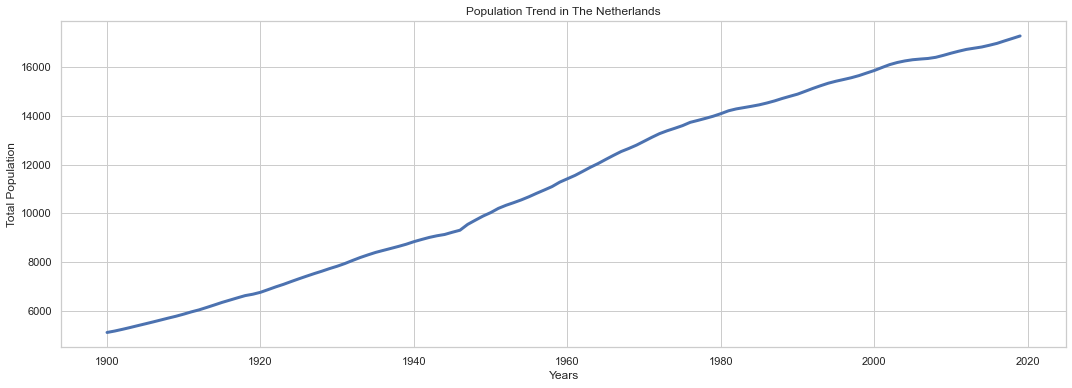

In [347]:
plt.figure(figsize=(18,6))
plt.plot(NL['Periods'], NL['TotalPopulation_1'],linewidth=3)
plt.title('Population Trend in The Netherlands')
plt.xlabel('Years')
plt.ylabel('Total Population')
plt.show();

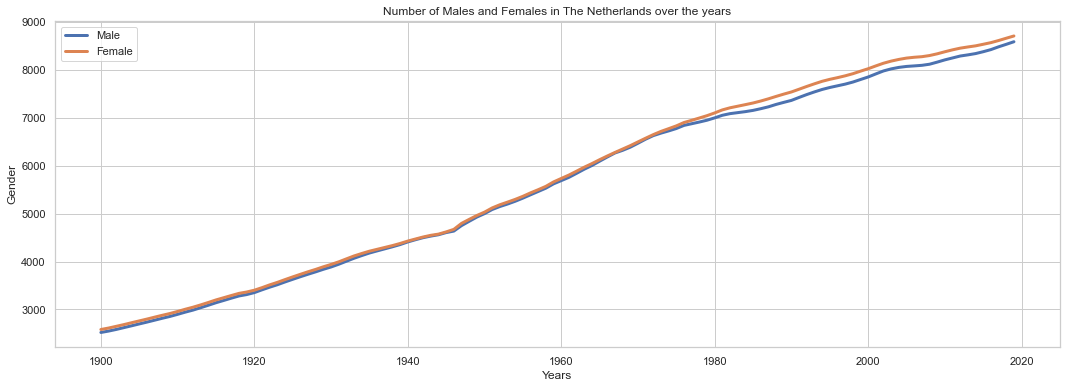

In [349]:
plt.figure(figsize=(18,6))
plt.plot(NL['Periods'], NL['Males_2'],linewidth=3)
plt.plot(NL['Periods'], NL['Females_3'],linewidth=3)
plt.title('Number of Males and Females in The Netherlands over the years')
plt.xlabel('Years')
plt.ylabel('Gender')
plt.legend(['Male', 'Female'],loc='upper left')
plt.show();

## Foreigners

Very little immigration ocurred between 1899 and 1950. From 1950s onwards, post-war boo triggered a high demand triggered of unskilled jobs which was compensated by the recruitment of 'guest workers' from southern Europe, mainly Spain, Turkey, Morocco and Yugoslavia.\
The high pick of Germans immigrating to the Netherlands in the mid 1930's are mainly jewish citizens in Germany after the anti-Semitic laws were imposed in April 1933.\
The oil crisis of the 1970s caused serious problems for the Dutch economy. As a result of this economic crisis, the labour migration was stopped in 1973. However, the introduction of the law on family reunification (1974) enabled the families left behind by many former guest labourers to move to the Netherlands. From that moment onwards, many women and children, especially of Moroccan or Turkish origin, began to arrive in the Netherlands.\
Around 1980's there was an increase in Refugees mainly from Turkey but also other natinalities not shown in this graph.

In [248]:
Foreigners_df=NL[['Periods','British_37','American_35','Belgian_36','German_38','Italian_39','Moroccan_40','Spanish_41','Turkish_42','FormerYugoslavian_43']]
Foreigners_df=pd.melt(Foreigners_df,id_vars=['Periods'])
Foreigners_df.head();

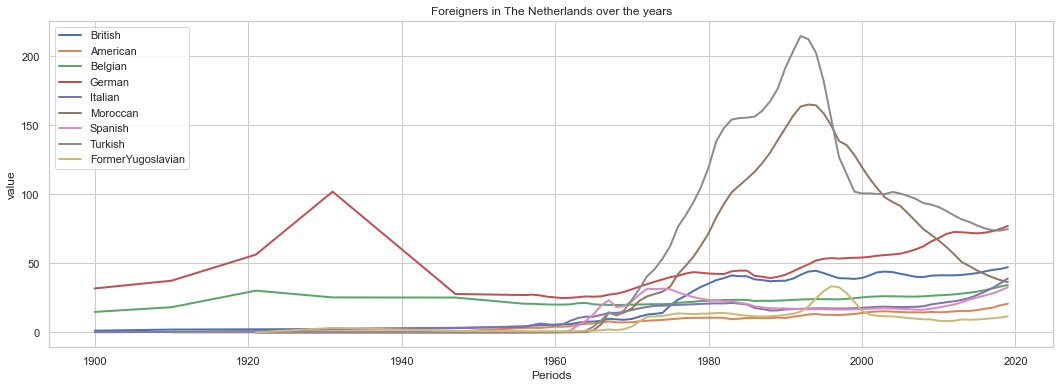

In [246]:
plt.figure(figsize=(18,6))
sns.lineplot(data=Foreigners_df, x='Periods', y='value',hue='variable',linewidth=2)
plt.title('Foreigners in The Netherlands over the years')
plt.legend(['British', 'American','Belgian','German','Italian','Moroccan','Spanish','Turkish','FormerYugoslavian'],loc='upper left');

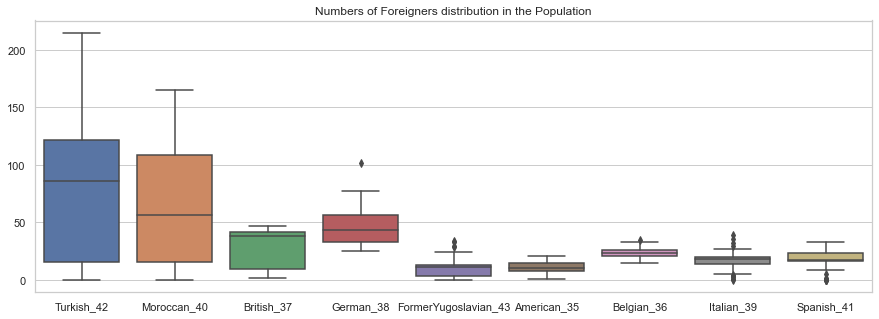

In [238]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.boxplot(data=NL[['Turkish_42', 'Moroccan_40','British_37','German_38','FormerYugoslavian_43','American_35','Belgian_36', 'Italian_39',
                     'Spanish_41']])
plt.title('Numbers of Foreigners distribution in the Population');

In [82]:
NL['%Foreigners'] = NL['TotalForeignNationalities_34']/NL['TotalPopulation_4']

Note that in the 1950–2015 time span, the total population almost doubled to 17.0 million, including 3.8 million immigrants (first and second generation).

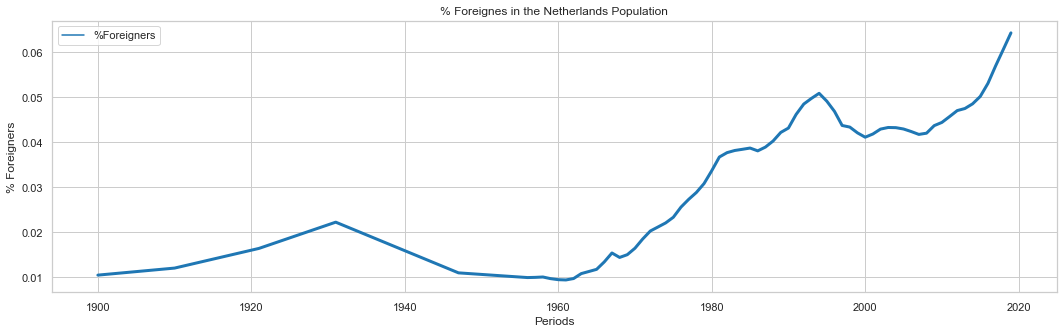

In [277]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['%Foreigners']
sns.lineplot(data=NL.set_index('Periods')[columns], palette="tab10", linewidth=3)
plt.ylabel('% Foreigners')
plt.title('% Foreignes in the Netherlands Population');

## Smoking

Since 2014, tobacco may only be sold to people aged 18 and older, instead of 16. The government introduced this change on the hope this will reduce the number of young people who smoke, and it seems to be working!\
<b>Heavy Smokers:</b> The percentage of persons in the population aged 12 years or older who smoke 20 or more cigarettes per day.\
<b>Quitting attempts in the past 12 months:</b> The percentage of the cigarette smokers aged 12 years or older who tried to stop smoking in the last 12 months, and succeeded for at least 24 hours.

In [84]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [85]:
import os
from IPython.display import Image, display, HTML

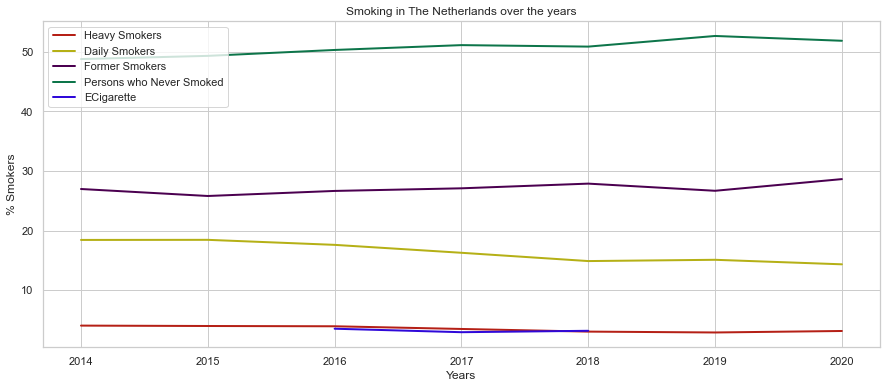

In [346]:
plt.figure(figsize=(15,6))
plt.plot(temp['Periods'], temp['HeavySmokersInThePopulation_6'],color='#b52016',linewidth=2)
plt.plot(temp['Periods'], temp['DailySmokersInThePopulation_4'],color='#b5b016',linewidth=2 )
plt.plot(temp['Periods'], temp['FormerSmokers_2'],color='#4b0050',linewidth=2 )
plt.plot(temp['Periods'], temp['PersonsWhoNeverSmoked_3'],color='#0d754a',linewidth=2 )
plt.plot(temp['Periods'], temp['ECigarette_14'],color='#2f09d9',linewidth=2 )
plt.title('Smoking in The Netherlands over the years')
plt.xlabel('Years')
plt.ylabel('% Smokers')
plt.legend(['Heavy Smokers','Daily Smokers', 'Former Smokers', 'Persons who Never Smoked','ECigarette'], loc='upper left')
plt.show();

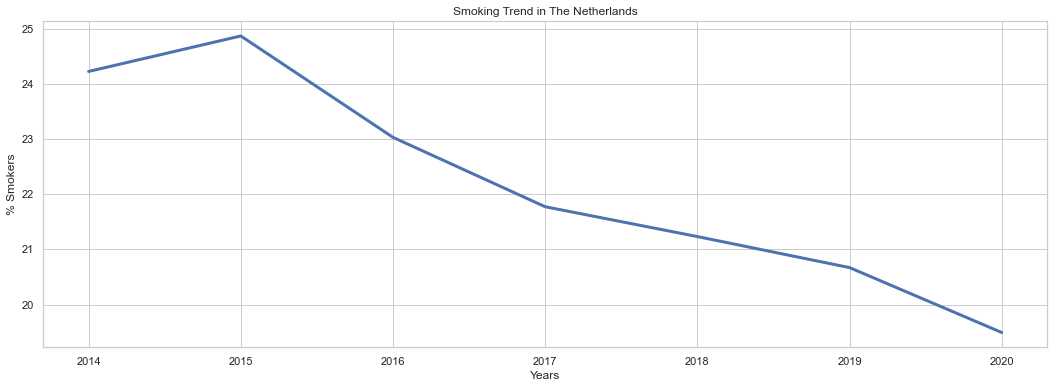

In [339]:
plt.figure(figsize=(18,6))
plt.plot(temp['Periods'], temp['Smokers_1'],linewidth=3)
plt.title('Smoking Trend in The Netherlands')
plt.xlabel('Years')
plt.ylabel('% Smokers')
plt.show();

In [253]:
@interact
def show_recs_more_than(column=list(LS.select_dtypes('number').columns), 
                          x=(5, 80, 1)):
    display(HTML(f'<h2>Showing records with more than {x} {column}<h2>'))
    display(LS.loc[LS[column] > x,
                   [ 'CigarettesPerDayPerSmoker_9', 'QuittingAttemptsInThePast12Months_11']])

interactive(children=(Dropdown(description='column', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2',…

## Alcohol

Same as with Tobacco, from 2014, alcohol may only be sold to people aged 18 and older, instead of 16. It also seems to be reducing the % of drinkers in the population! The Heavy and Excesive drinkers population has dimished slightly.\
However, in the past 6 years, the population who drinks 1 glass /day as increased from 44% to more than 50%!\
<b>Excessive drinkers:</b> The percentage of drinkers aged 12 years or older who drink at least 21 glasses a week (men) or 14 glasses a week (women).\
<b>Heavy drinkers:</b>The percentage of persons in the population aged 12 years or older who at least once a week drink 6 or more alcoholic beverages in one day (men) or who at least once a week drink 4 or more of alcoholic beverages in one day (women). 

In [319]:
temp = LS.groupby(['Periods']).mean('ExcessiveDrinkersInThePopulation_31')
temp=temp.reset_index()


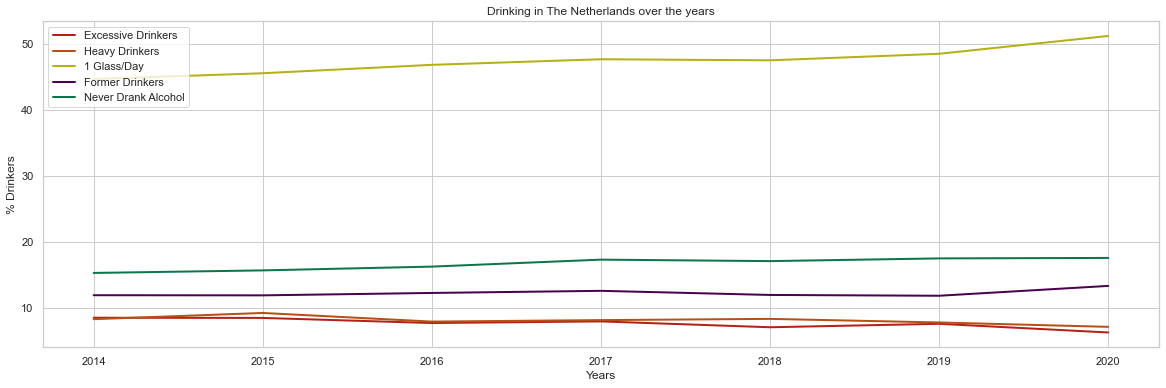

In [326]:
plt.figure(figsize=(20,6))
plt.plot(temp['Periods'], temp['ExcessiveDrinkersInThePopulation_31'],color='#b52016',linewidth=2)
plt.plot(temp['Periods'], temp['HeavyDrinkersInThePopulation_29'],color='#b55016',linewidth=2 )
plt.plot(temp['Periods'], temp['UpTo1GlassPerDayInThePopulation_34'],color='#b5b016',linewidth=2 )
plt.plot(temp['Periods'], temp['FormerDrinkers_27'],color='#4b0050',linewidth=2 )
plt.plot(temp['Periods'], temp['PersonsWhoNeverDrankAlcohol_28'],color='#0d754a',linewidth=2 )
plt.title('Drinking in The Netherlands over the years')
plt.xlabel('Years')
plt.ylabel('% Drinkers')
plt.legend(['Excessive Drinkers','Heavy Drinkers', '1 Glass/Day', 'Former Drinkers','Never Drank Alcohol'], loc='upper left')
plt.show();

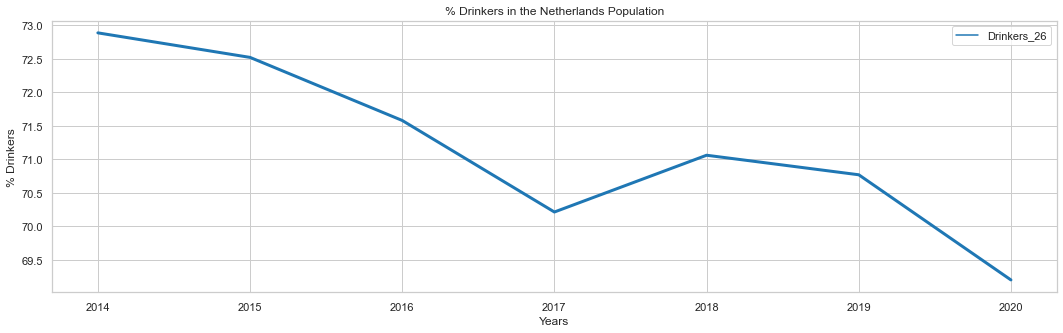

In [327]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['Drinkers_26']
sns.lineplot(data=temp.set_index('Periods')[columns], palette="tab10", linewidth=3)
plt.title('% Drinkers in the Netherlands Population')
plt.ylabel('% Drinkers')
plt.xlabel('Years');

## Sport

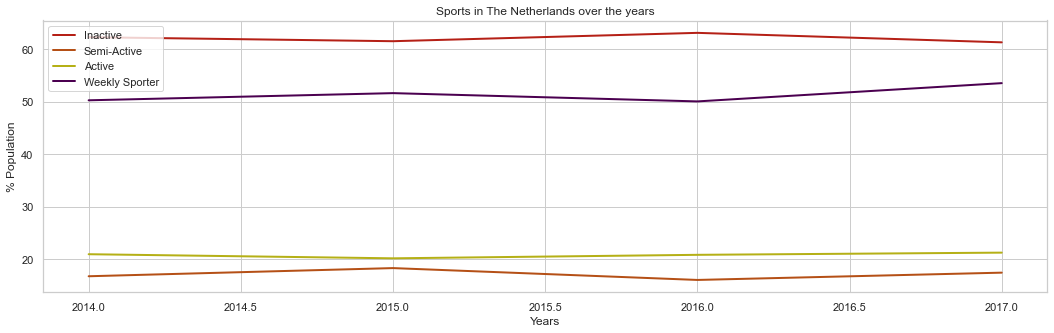

In [345]:
plt.figure(figsize=(18,5))
plt.plot(temp['Periods'], temp['Inactive_73'],color='#b52016',linewidth=2)
plt.plot(temp['Periods'], temp['SemiActive_74'],color='#b55016',linewidth=2 )
plt.plot(temp['Periods'], temp['NormActive_75'],color='#b5b016',linewidth=2 )
plt.plot(temp['Periods'], temp['WeeklySporter_77'],color='#4b0050',linewidth=2 )
plt.title('Sports in The Netherlands over the years')
plt.xlabel('Years')
plt.ylabel('% Population')
plt.legend(['Inactive', 'Semi-Active', 'Active','Weekly Sporter'], loc='upper left')
plt.show();

## Divorce

Dissolution of the marriage pronounced by a judge on the basis of legal grounds. The divorce comes into force once it has been recorded in the municipal population register. This charts shows Divorces per 1,000 of the average number of married men (=couples).\
This numbers exclude Registered partnership (A marriage-like relationship between two people of the opposite or same sex).

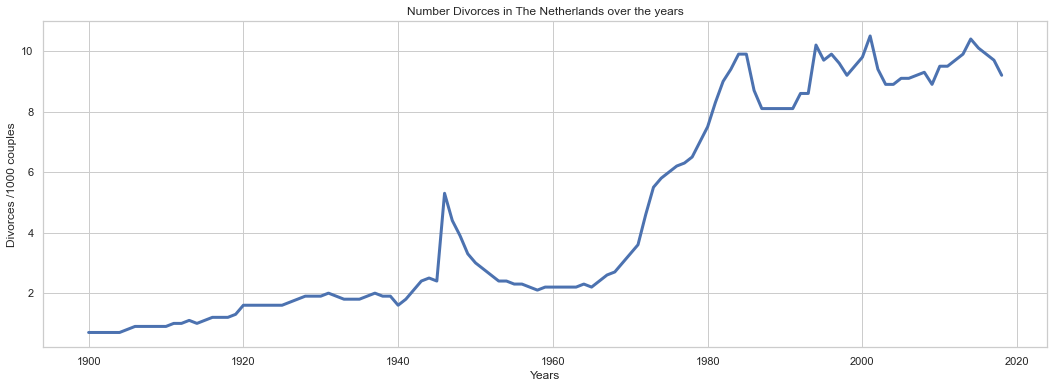

In [338]:
plt.figure(figsize=(18,6))
plt.plot(NL['Periods'], NL['DivorcesRelative_180'],linewidth=3)
plt.title('Number Divorces in The Netherlands over the years')
plt.xlabel('Years')
plt.ylabel('Divorces /1000 couples')
plt.show();

## Lenght

Recent scientific studies show that both Dutch men and women are the tallest in the world. The average height of Dutch men is 182.8 cm, and the average height of Dutch women is 169.3 cm. The Dutch are so tall due to high living standards, an excellent health care system, and natural selection.\
Interestingly, another Dutch study showed that Dutch men born in 2001 were on average 1 cm smaller than the 1980 generation, and women on average 1.4 cm. Hence, it seems that the remarkable growth of the Dutch is coming to a standstill.\
At present, it is unclear why the growth of the Dutch is leveling off, but Dutch scientists now study a few possible explanations. First, the increased immigration, shorter population groups, and their children born in The Netherlands may be a possible explanation, at least partly. However, other factors may have a larger influence, like changing dietary habits in The Netherlands with fewer nutrients important for growth but more calories.

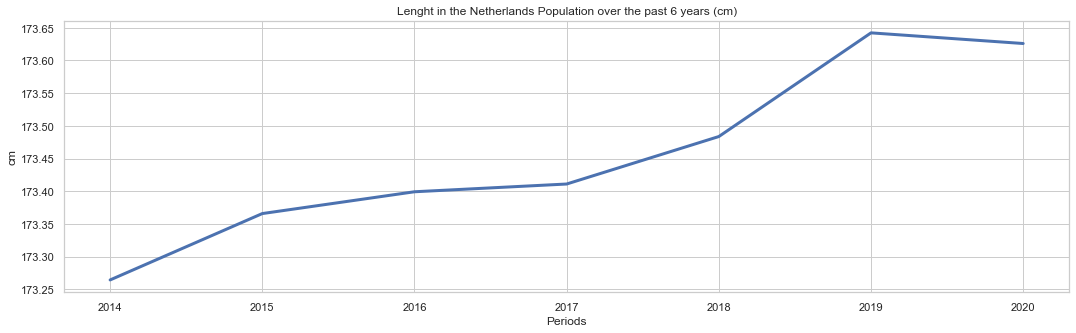

In [342]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))

sns.lineplot(data=temp,x=temp['Periods'], y=temp['ReportedLength18YearsOrOlder_57'],linewidth=3)
plt.title('Lenght in the Netherlands Population over the past 6 years (cm)')
plt.ylabel('cm');

## Weight

The body weight of the average Dutch adult has increased more rapidly than their body length. Over the past two decades, the average man gained 5.6 kg and the average woman 3.7 kg.\
Changes in body length and weight over the past twenty years were concomitant with a considerable increase in people struggling with overweight problems. The proportion of obese people has also increased relatively fast.\
According to the goverment statistics, more than 100,000 people in the Netherlands above the age of 20 were morbidly obese in 2017. There are people with BMI of 30,0 kg/m2 or more.\
Here we split in in different groups (age, gender, position in the family, background, education & wealth)

<b>Underweight:</b> The percentage of persons whose BMI is lower than 18,5 kg/m2\
<b>Normal Weight:</b> The percentage of persons whose BMI value is between 18,5 and 25,0 kg/m2\
<b>Overweight:</b> The percentage of persons whose BMI is 25,0 kg/m2 or more\
<b>Moderate Overweight:</b> The percentage of persons whose BMI is between 25,0 and 30,0 kg/m2\
<b>Severe Overweight:</b> The percentage of persons whose BMI is 30,0 kg/m2 or more           

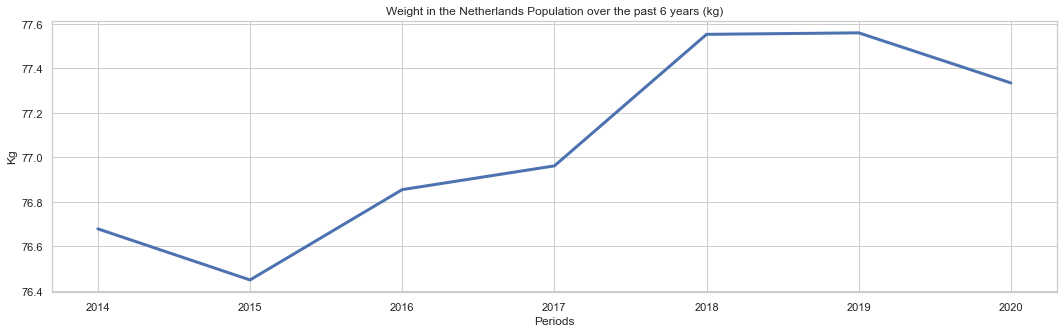

In [341]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))

sns.lineplot(data=temp,x=temp['Periods'], y=temp['ReportedWeight18YearsOrOlder_58'],linewidth=3)
plt.title('Weight in the Netherlands Population over the past 6 years (kg)')
plt.ylabel('Kg');

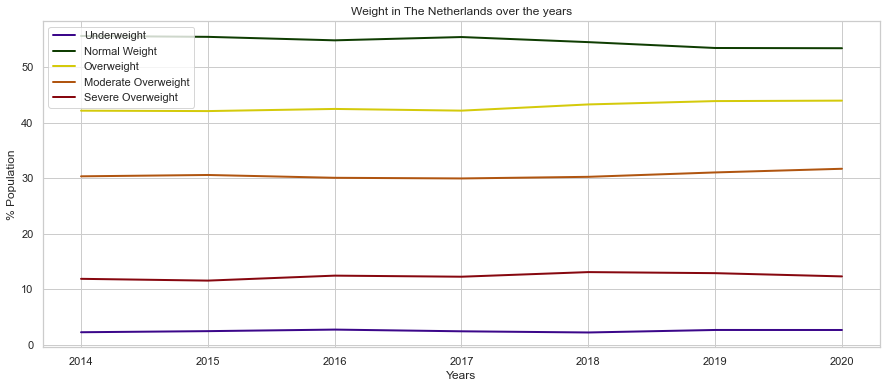

In [294]:
plt.figure(figsize=(15,6))
plt.plot(temp['Periods'], temp['Underweight_59'],color='#3b078a',linewidth=2)
plt.plot(temp['Periods'], temp['NormalWeight_60'],color='#0f3d02',linewidth=2 )
plt.plot(temp['Periods'], temp['Overweight_61'],color='#d4ca0b',linewidth=2 )
plt.plot(temp['Periods'], temp['ModerateOverweight_62'],color='#b05510',linewidth=2 )
plt.plot(temp['Periods'], temp['SevereOverweight_63'],color='#87070f',linewidth=2 )
plt.title('Weight in The Netherlands over the years')
plt.xlabel('Years')
plt.ylabel('% Population')
plt.legend(['Underweight', 'Normal Weight', 'Overweight','Moderate Overweight','Severe Overweight'], loc='upper left')
plt.show();

### % Severe Overweight vs Age

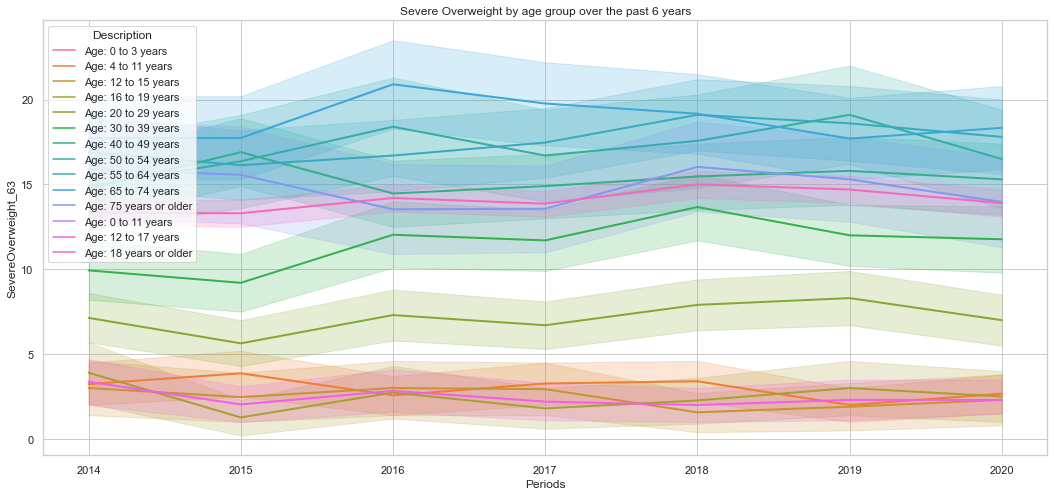

In [301]:
Age_filter = LS['Description'].str.startswith('Age:')

plt.figure(figsize=(18,8))

sns.lineplot(data=LS[Age_filter],x='Periods',y='SevereOverweight_63', hue='Description',linewidth=2)
plt.title('Severe Overweight by age group over the past 6 years');

### % Severe Overweight vs Gender

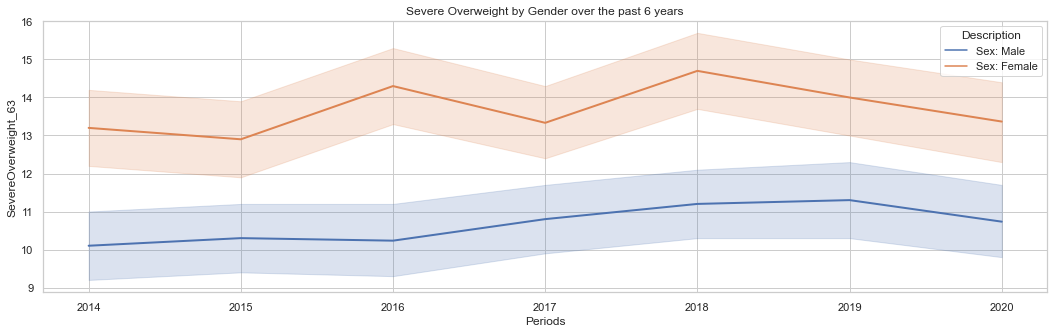

In [304]:
Sex_filter = LS['Description'].str.startswith('Sex:')

plt.figure(figsize=(18,5))

sns.lineplot(data=LS[Sex_filter],x='Periods',y='SevereOverweight_63', hue='Description',linewidth=2)
plt.title('Severe Overweight by Gender over the past 6 years');

### % Severe Overweight vs Position in a Family

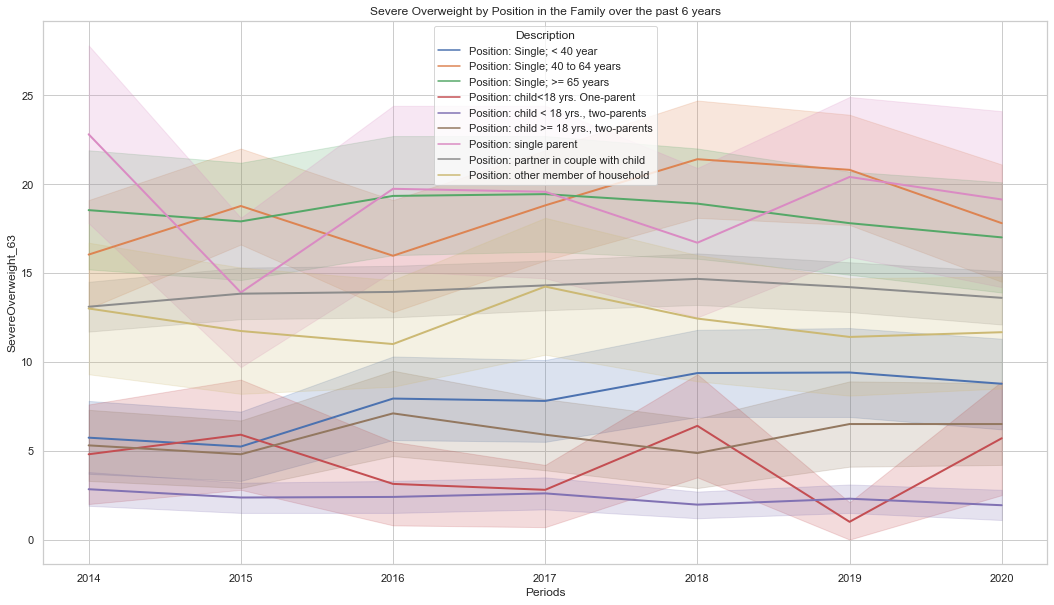

In [303]:
Position_filter = LS['Description'].str.startswith('Position:')
temp=LS[Position_filter]

plt.figure(figsize=(18,10))
sns.lineplot(data=temp,x='Periods', y='SevereOverweight_63',hue='Description',linewidth=2)
plt.title('Severe Overweight by Position in the Family over the past 6 years');

### % Severe Overweight vs Backround

<b>Non-Western:</b> Person with a non-western migration background, originating from a country in Africa, South America or Asia (excl. Indonesia and Japan) or Turkey. 
Due to their socioeconomic and cultural position people from Indonesia and Japan residing in the Netherlands are considered as having a western migration background. They are mainly people born in the former Dutch East Indies and expatriates employed by Japanese companies with their families.\
<b>Western:</b> Person with a western migration background, originating from a country in Europe (excluding Turkey), North America or Oceania, or Indonesia or Japan.\
<b>1st generation non-western:</b>Person born abroad with at least one parent who was born abroad.\
<b>2nd generation non-western:</b>Person born in the Netherlands who has at least one parent born abroad.

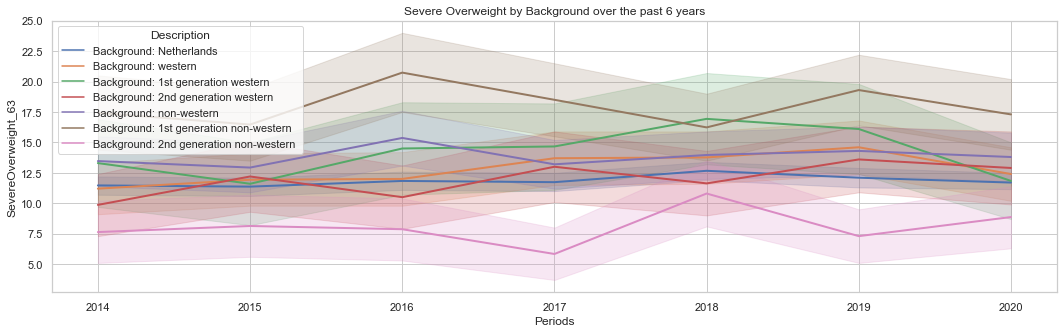

In [305]:
Background_filter = LS['Description'].str.startswith('Background:')

plt.figure(figsize=(18,5))

sns.lineplot(data=LS[Background_filter],x='Periods',y='SevereOverweight_63', hue='Description',linewidth=2)
plt.title('Severe Overweight by Background over the past 6 years');

### % Severe Overweight vs Level of Education

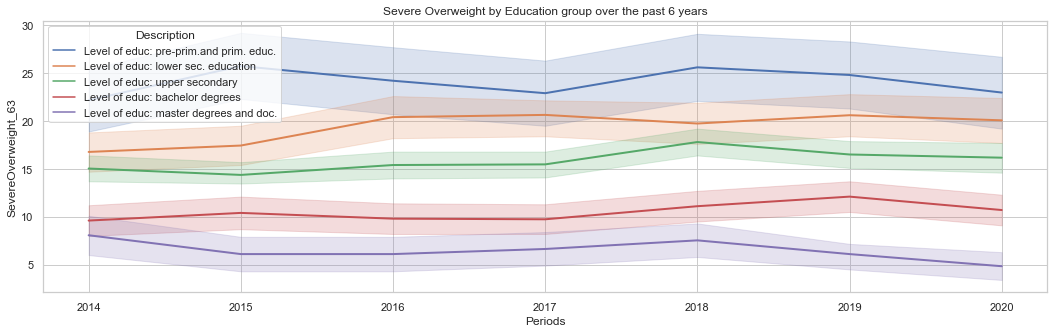

In [307]:
Level_Education_filter=LS['Description'].str.startswith('Level of educ:')

plt.figure(figsize=(18,5))

sns.lineplot(data=LS[Level_Education_filter],x='Periods', y='SevereOverweight_63',hue='Description',linewidth=2)
plt.title('Severe Overweight by Education group over the past 6 years');

### % Severe Overweight vs Wealth

<b>Wealth</b> equals assets minus liabilities.\
Assets are mainly bank balances, shares, real estate (own home), and business capital. Liabilities include mortgages on the house and consumer credit.                     
Households have been subdivided by level of equivalised wealth in five groups (quintiles) with an equal number of households.  The wealth boundaries between these five 20%-groups differ from year to year.\
In this case 5th group has the highest income and 1st group the lowest.

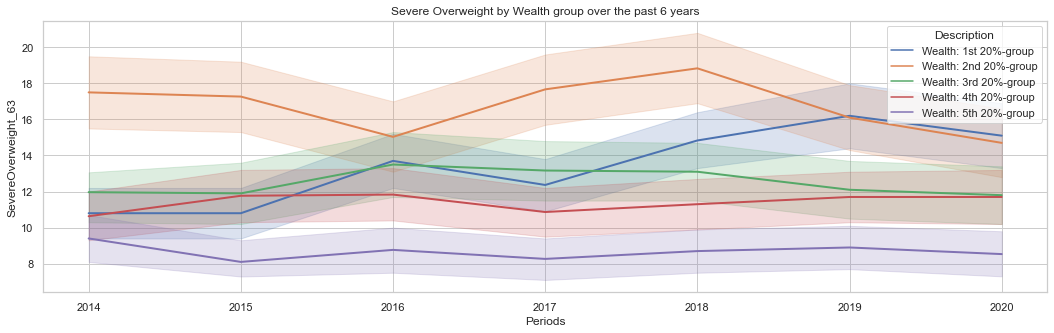

In [308]:
Wealth_filter= LS['Description'].str.startswith('Wealth:')

plt.figure(figsize=(18,5))

sns.lineplot(data=LS[Wealth_filter],x='Periods', y='SevereOverweight_63',hue='Description',linewidth=2)
plt.title('Severe Overweight by Wealth group over the past 6 years');

## Deaths & Life Expectancy

Mortality in the Netherlands is reducing for all age groups, but particularly for over 80 years old.
Life expectancy has increased to an actual average of 82.64 years (Aprox 84 for females and 81 for males), putting the Netherlands within the top 20 countries regarding Life Expectancy.

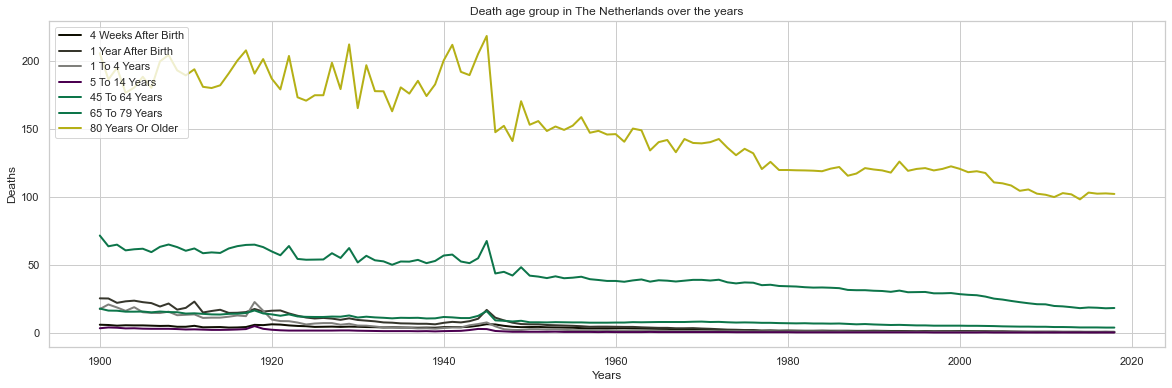

In [309]:
plt.figure(figsize=(20,6))
plt.plot(NL['Periods'], NL['Deaths4WeeksAfterBirth_87'],color='#0f0f02',linewidth=2)
plt.plot(NL['Periods'], NL['Deaths1YearAfterBirth_89'],color='#36362c',linewidth=2 )
plt.plot(NL['Periods'], NL['k_1To4Years_91'],color='#80807c',linewidth=2 )
plt.plot(NL['Periods'], NL['k_5To14Years_92'],color='#4b0050',linewidth=2 )
plt.plot(NL['Periods'], NL['k_45To64Years_94'],color='#0d754a',linewidth=2 )
plt.plot(NL['Periods'], NL['k_65To79Years_95'],color='#0d754a',linewidth=2 )
plt.plot(NL['Periods'], NL['k_80YearsOrOlder_96'],color='#b5b016',linewidth=2 )
plt.title('Death age group in The Netherlands over the years')
plt.xlabel('Years')
plt.ylabel('Deaths')
plt.legend(['4 Weeks After Birth','1 Year After Birth', '1 To 4 Years', '5 To 14 Years','45 To 64 Years',
            '65 To 79 Years','80 Years Or Older'], loc='upper left')
plt.show();

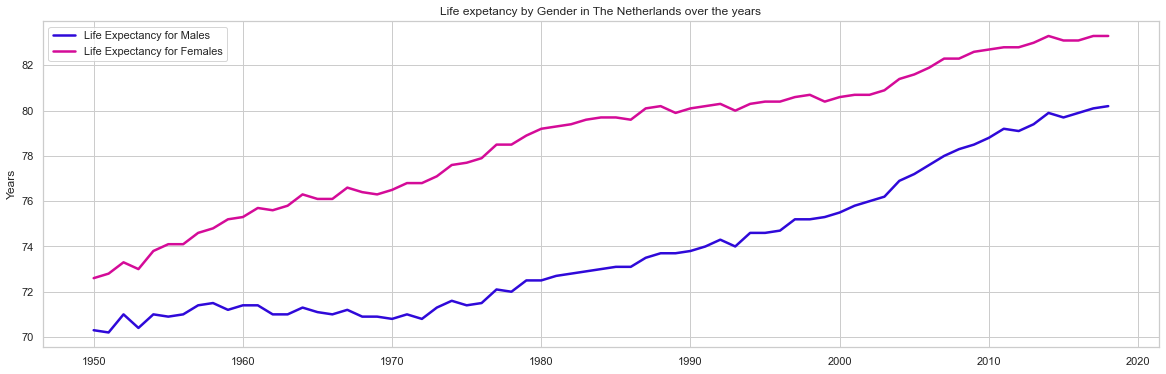

In [340]:
plt.figure(figsize=(20,6))
plt.plot(NL['Periods'], NL['LifeExpectancyAtBirthMale_79'],color='#2f09d9',linewidth=2.5)
plt.plot(NL['Periods'], NL['LifeExpectancyAtBirthFemale_80'],color='#d40b98',linewidth=2.5 )
plt.title('Life expetancy by Gender in The Netherlands over the years')
plt.ylabel('Years')
plt.legend(['Life Expectancy for Males','Life Expectancy for Females'], loc='upper left')
plt.show();

## Age

There is clearly an increase in the number of elderly people and a fall in the number people under the age of 20.\
A large section of the population consists of people born between 1946 and 1970, the children of the post-war baby boom. At the beginning of 2020, they were between 51 and 75 years old.\
This brings and increase in the Grey pressure (explained below)

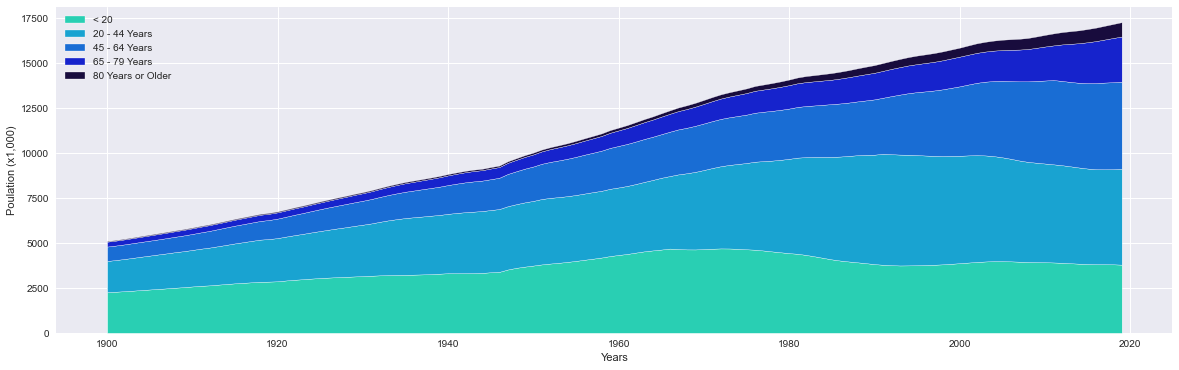

In [371]:
plt.figure(figsize=(20,6))
color_map = ["#29cfb3", "#19a3d1", "#196dd4", "#1623cc","#180c3d"]
plt.stackplot(NL['Periods'],NL['YoungerThan20Years_5'],NL['k_20To44Years_6'], NL['k_45To64Years_7'], NL['k_65To79Years_8'], NL['k_80YearsOrOlder_9'], 
              labels=['< 20','20 - 44 Years','45 - 64 Years', '65 - 79 Years','80 Years or Older'], colors = color_map)
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Poulation (x1,000)')
plt.show();

## Grey /  Green pressure

<b>Grey Pressure</b> is the ratio of the non-working population (over 65 years) to the working population (20-65 years) and is calculated by dividing the total of the non-working population over 65 by the working population x 100\
In 2009 in the Netherlands, this figure stood at 24.5 percent and increased to 33.7 percent by 2021. The increase is due to the considerable rise in the number of over-65s in the total population\
<b>Green Pressure</b> is the ratio of the non-working population (0-20 years) to the working population (20-65 years) and is calculated by dividing the total of the non-working young population by the working population x 100.

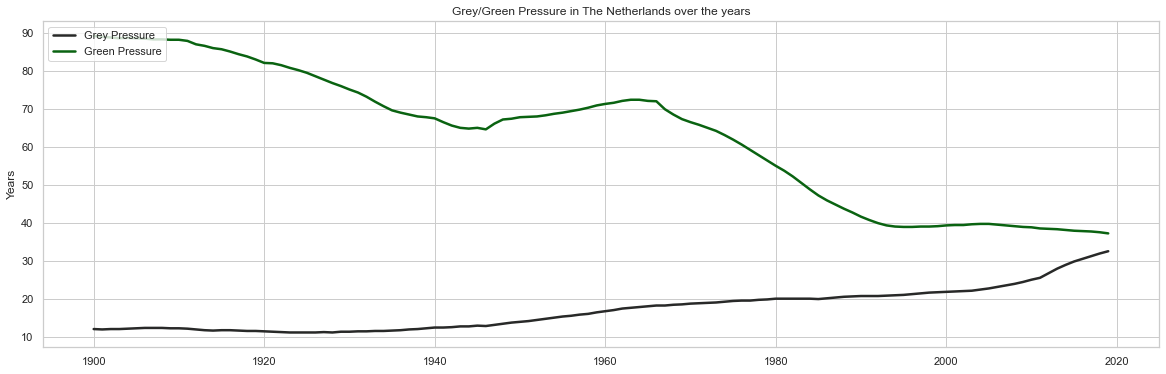

In [353]:
plt.figure(figsize=(20,6))
plt.plot(NL['Periods'], NL['GreyPressure_11'],color='#282928',linewidth=2.5)
plt.plot(NL['Periods'], NL['GreenPressure_10'],color='#0a6311',linewidth=2.5 )
plt.title('Grey/Green Pressure in The Netherlands over the years')
plt.ylabel('Years')
plt.legend(['Grey Pressure','Green Pressure'], loc='upper left')
plt.show();

## Correlating & Foreigners to different data

In [190]:
NL_From_2014 = NL[NL['Periods'] >= 2014]

LS_From_2014 = LS.groupby(['Periods']).mean()
JoinDatasets= pd.merge(NL_From_2014, LS_From_2014, on='Periods', how='inner')
JoinDatasets

,ID_x,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,YoungerThan20Years_5,k_20To44Years_6,k_45To64Years_7,k_65To79Years_8,k_80YearsOrOlder_9,GreenPressure_10,GreyPressure_11,TotalPopulation_12,NeverMarried_13,Married_14,Widowed_15,Divorced_16,TotalPopulation_17,NorthNetherlands_18,EastNetherlands_19,WestNetherlands_20,SouthNetherlands_21,TotalPopulation_22,LessThan5000Inhabitants_23,k_5000To19999Inhabitants_24,k_20000To49999Inhabitants_25,k_50000To99999Inhabitants_26,k_100000InhabitantsOrMore_27,TotalNumberOfMunicipalities_28,LessThan5000Inhabitants_29,k_5000To19999Inhabitants_30,k_20000To49999Inhabitants_31,k_50000To99999Inhabitants_32,k_100000InhabitantsOrMore_33,TotalForeignNationalities_34,American_35,Belgian_36,British_37,German_38,Italian_39,Moroccan_40,Spanish_41,Turkish_42,FormerYugoslavian_43,PersonsWithSurinameseBackground_44,PersonsWithAntilleanBackground_45,TotalPrivateHouseholds_46,MalesAndFemales_47,Males_48,Females_49,MultiPersonHouseholds_50,AverageHouseholdsize_51,TotalPersonsInPrivateHouseholds_52,ChildrenInPrivateHouseholds_53,LiveBornChildren_54,Deaths_55,NaturalIncrease_56,Immigration_57,EmigrationIncludingAdministrativeC_58,NetMigration_59,TotalGrowth_60,TotalGrowthRelative_61,LiveBornChildren_62,LiveBornChildrenRelative_63,SexRatio_64,AverageNumberOfChildrenPerFemale_65,TotalLiveBornChildren_66,YoungerThan20Years_67,k_20To24Years_68,k_25To29Years_69,k_30YearsOrOlder_70,k_1stChild_71,k_2ndChild_72,k_3rdChild_73,k_4thAndSubsequentChildren_74,LiveBornChildrenMotherNotMarried_75,Deaths_76,DeathsRelative_77,DeathsSexRatio_78,LifeExpectancyAtBirthMale_79,LifeExpectancyAtBirthFemale_80,k_28WeeksOrMoreRelative_81,k_24WeeksOrMoreRelative_82,PerinatalMortality24_83,PerinatalMortality24Relative_84,PerinatalMortality28_85,PerinatalMortality28Relative_86,Deaths4WeeksAfterBirth_87,Deaths4WeeksAfterBirthRelative_88,Deaths1YearAfterBirth_89,Deaths1YearAfterBirthRelative_90,k_1To4Years_91,k_5To14Years_92,k_15To44Years_93,k_45To64Years_94,k_65To79Years_95,k_80YearsOrOlder_96,PersonsMovedWithinMunicipalities_97,TotalPersons_98,...,Drinkers_26,FormerDrinkers_27,PersonsWhoNeverDrankAlcohol_28,HeavyDrinkersInThePopulation_29,HeavyDrinkersAmongDrinkers_30,ExcessiveDrinkersInThePopulation_31,ExcessiveDrinkersAmongDrinkers_32,NumberOfAlcoholicBeveragesPerDay_33,UpTo1GlassPerDayInThePopulation_34,GuidelineAlcoholUse_35,LastMonth_36,LastYear_37,Ever_38,LastMonth_39,LastYear_40,Ever_41,LastMonth_42,LastYear_43,Ever_44,LastMonth_45,LastYear_46,Ever_47,LastMonth_48,LastYear_49,Ever_50,LastMonth_51,LastYear_52,Ever_53,LastMonth_54,LastYear_55,Ever_56,ReportedLength18YearsOrOlder_57,ReportedWeight18YearsOrOlder_58,Underweight_59,NormalWeight_60,Overweight_61,ModerateOverweight_62,SevereOverweight_63,ComplyWithPhysicalActivityGuidelines_64,SufficientlyActiveModerateIntensity_65,SufficientMuscleBoneStrengthActiv_66,WeeklySporter_67,SubscriptionSportsProvider_68,MemberSportsClub_69,Inactive_70,SemiActive_71,NormActive_72,Inactive_73,SemiActive_74,NormActive_75,MeetingTheCombinationNorm_76,WeeklySporter_77,HighRiskSexualActivity_78,RiskUnplannedPregnancy1649Years_79,HIVTest_80,STDTestExcludingHIVTest_81,UseOfContraceptionPillIncl1649_82,UseOfContraceptivePill1649Years_83,SufficientFruitDuring7DaysAWeek_84,AtLeast5DaysAWeekSufficientFruit_85,SufficientVegetablesDuring7DaysWeek_86,AtLeast5DaysWkSufficientVegetables_87,AtLeastOneDayAWeek_88,Min2DaysWeekOfWhich1XOilyFish_89,InThePast5Years_90,MoreThan5YearsAgo_91,Never_92,DonTKnow_93,InThePast2Years_94,MoreThan2YearsAgo_95,Never_96,DonTKnow_97,InThePast5Years_98,NotInThePast5Years_99,DonTKnow_100,InThePast12Months_101,MoreThan12MonthsAgo_102,Never_103,DonTKnow_104,InThePast12Months_105,MoreThan12MonthsAgo_106,Never_107,DonTKnow_108,InThePast12Months_109,MoreThan12MonthsAgo_110,Never_111,DonTKnow_112,InThePast2Years_113,MoreThan2YearsAgo_114,Never_115,DonTKnow_116,InThePast12Months_117,MoreThan12MonthsAgo_118,Never_119,DonTKnow_120,InfluenzaInoculation16YearsOrOlder_121,InformalC

In [331]:
@interact
def correlations(column1=list(['Deaths_55','Deaths4WeeksAfterBirth_87','ReportedLength18YearsOrOlder_57',
                               'ReportedWeight18YearsOrOlder_58','LifeExpectancyAtBirthMale_79','LifeExpectancyAtBirthFemale_80','Divorces_179']), 
                 column2=list(['%Foreigners'])):
    print(f"Correlation: {JoinDatasets[column1].corr(JoinDatasets[column2])}")



interactive(children=(Dropdown(description='column1', options=('Deaths_55', 'Deaths4WeeksAfterBirth_87', 'Repo…

## Predicting Population growth

In [380]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [390]:
NL.shape

(121, 191)

In [401]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, input_shape=[190]),
    layers.Activation("tanh"),
    layers.Dense(units=5),
    layers.Activation("tanh"),    
    layers.Dense(units=1)
])

In [402]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               97792     
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 5)                 2565      
                                                                 
 activation_9 (Activation)   (None, 5)                 0         
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 100,363
Trainable params: 100,363
Non-trainable params: 0
_________________________________________________________________


In [405]:
X = NL.drop("TotalPopulation_4", axis=1)
y = NL["TotalPopulation_4"]

In [406]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(
    X,
    y
)

In [408]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

In [409]:
epochs_hist = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=50,
    verbose=1,
    #validation_split=0.2
)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: nan - mae: nan
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: nan - mae: nan
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: nan - mae: nan


In [410]:
pred=model.predict(X_test)

In [411]:
print("Preditions:", pred[:10])
print("Actual:", y_test[:10])

Preditions: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Actual: 42      8923.0
119    17181.0
41      8834.0
34      8183.0
64     11890.0
24      7081.0
100    15760.0
75     13491.0
71     12958.0
8       5616.0
Name: TotalPopulation_4, dtype: float64


## References

CBS OpenData StatLine - Netherlands Population dynamics from 1899 https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=37556eng&_theme=1113

LyfeStyle from 2014 https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83021ENG&_theme=1064